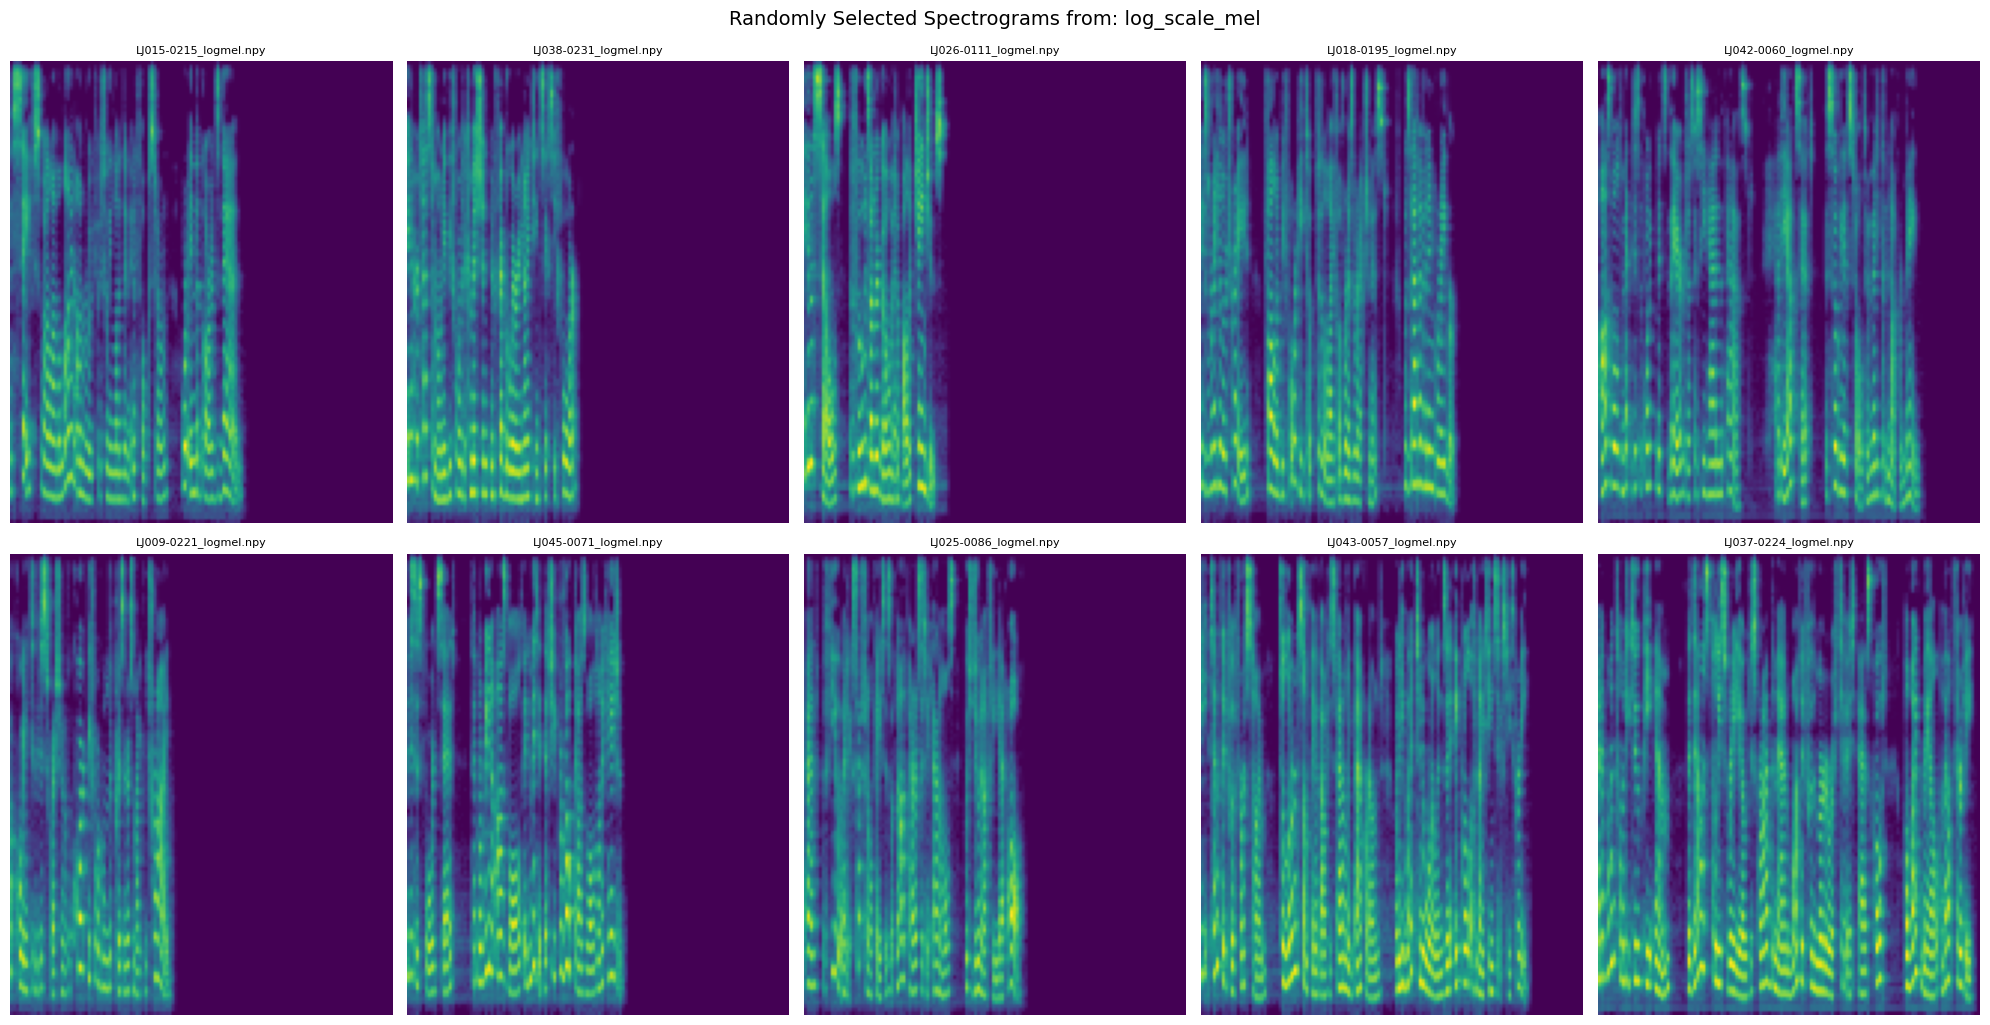

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

# --- Configuration ---
# Path to the directory where your .npy spectrogram files are stored
SPECTROGRAM_DIR = "log_scale_mel" # MAKE SURE THIS PATH IS CORRECT

# Number of spectrograms to randomly select and plot
NUM_TO_PLOT = 10

# Figure an`d plotting settings
FIG_SIZE = (20, 10) # Width, Height in inches for the entire figure
COLS = 5           # Number of columns for subplots
# ---------------------

def plot_random_spectrograms(spectrogram_dir, num_to_plot, fig_size, num_cols):
    """
    Randomly selects and plots spectrograms from .npy files in a directory.

    Args:
        spectrogram_dir (str): Path to the directory containing .npy spectrograms.
        num_to_plot (int): Number of spectrograms to plot.
        fig_size (tuple): Figure size (width, height).
        num_cols (int): Number of columns for subplots.
    """
    if not os.path.isdir(spectrogram_dir):
        print(f"Error: Directory not found: {spectrogram_dir}")
        return

    npy_files = [f for f in os.listdir(spectrogram_dir) if f.lower().endswith('.npy')]

    if not npy_files:
        print(f"No .npy files found in {spectrogram_dir}")
        return

    if len(npy_files) < num_to_plot:
        print(f"Warning: Found only {len(npy_files)} files, plotting all of them.")
        num_to_plot = len(npy_files)
        selected_files = npy_files
    else:
        selected_files = random.sample(npy_files, num_to_plot)

    num_rows = (num_to_plot + num_cols - 1) // num_cols  # Calculate rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=fig_size)
    axes = axes.flatten() # Flatten to easily iterate regardless of subplot grid

    for i, fname in enumerate(selected_files):
        file_path = os.path.join(spectrogram_dir, fname)
        try:
            spectrogram = np.load(file_path)

            ax = axes[i]
            # Assuming the spectrogram is (Mel_bands, Time_frames)
            # librosa.display.specshow can also be used if you want axis labels for Hz/time
            # but for a quick check, imshow is fine.
            img = ax.imshow(spectrogram, aspect='auto', origin='lower', cmap='viridis')
            # If your spectrograms were created with librosa.power_to_db, origin='lower' is usually correct.
            # 'viridis' is a common colormap; 'magma' or 'inferno' also work well.

            ax.set_title(fname, fontsize=8)
            ax.axis('off') # Turn off axis numbers and ticks for cleaner look

            # Add a colorbar to each subplot if desired, or one for the whole figure
            # fig.colorbar(img, ax=ax, format='%+2.0f dB') # Example if data is in dB

        except Exception as e:
            print(f"Error loading or plotting {file_path}: {e}")
            if i < len(axes):
                axes[i].set_title(f"Error: {fname}", fontsize=8)
                axes[i].axis('off')

    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.suptitle(f"Randomly Selected Spectrograms from: {os.path.basename(spectrogram_dir)}", fontsize=14, y=1.02)
    plt.show()

if __name__ == '__main__':
    # This part will run if you execute the script directly.
    # For .ipynb, you can just call the function in a cell.
    plot_random_spectrograms(SPECTROGRAM_DIR, NUM_TO_PLOT, FIG_SIZE, COLS)